In [1]:
from quantile_regression_class import *

In [2]:
data = pd.read_csv("data/data.csv")

In [3]:
data.head(3)

,latitude,longitude,date_posted,price,sqft,bedrooms,bathrooms,pets,laundry,parking,craigslist
0,34.860788,-118.170104,2018-10-08 22:29:36,895.0,500.0,1.0,1.0,none,shared,off-street,losangeles
1,34.861017,-118.169932,2018-10-15 11:44:23,895.0,500.0,1.0,1.0,none,shared,off-street,losangeles
2,34.861017,-118.169932,2018-10-15 11:53:06,895.0,500.0,1.0,1.0,none,shared,off-street,losangeles


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15552 entries, 0 to 15551
Data columns (total 11 columns):
latitude       15552 non-null float64
longitude      15552 non-null float64
date_posted    15552 non-null object
price          15552 non-null float64
sqft           15552 non-null float64
bedrooms       15552 non-null float64
bathrooms      15552 non-null float64
pets           15552 non-null object
laundry        15552 non-null object
parking        15552 non-null object
craigslist     15552 non-null object
dtypes: float64(6), object(5)
memory usage: 1.3+ MB


This data set contains the renting price scraped from renting website. It covers most major cities in California. However, I'm only intered in the lower quantile of renting price because obviously, I cannot afford the mean value. Next, I will build three models to predict the 25th quantile of renting prices in California and compare the results.

In [8]:
x = data[['latitude','longitude','sqft','bedrooms','pets','laundry','parking','craigslist']]
y = data['price']
qt =0.25

### Linear Quantile Regression

Linear quantile regression is an extention of linear regression model. Instead of using the method of least square, linear quantile regression estimates the nth quantile by minimizing the quantile loss score.

In [9]:
lqr = LinearQuantileRegression(qt, x, y)
print("the quantile loss score for linear quantile regression is: ",lqr.loss_score())

the quantile loss score for linear quantile regression is:  135.1712855757834


### Random Forest

In [16]:
params_rf = {'n_estimators':300}
rf = RandomForestRegression(qt, x, y,params_rf)
print("the quantile loss score for quantile random forest is: ",rf.loss_score())

the quantile loss score for quantile random forest is:  13.764128301706238


As is shown in above result, random forest improves the result dramatically. Next, we will explore it's feature importance.

In [20]:
import seaborn as sns
imp = rf.feature_importance()

In [26]:
imp = imp.to_frame().reset_index()
imp.columns = ['feature','importance']

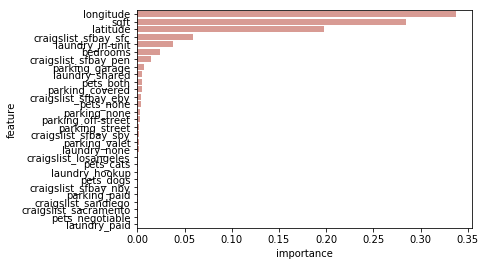

In [31]:
ax = sns.barplot("importance", y="feature", data=imp,
                  color="salmon", saturation=.5)

### Gradient Boosting

In [12]:
params_gb = {'max_depth':None,'n_estimators':300}
gb = GradientBoostingRegression(0.1, x, y,params_gb)
print("the quantile loss score for quantile gradient boosting is: ",gb.loss_score())

the quantile loss score for quantile gradient boosting is:  7.158248356675713


In [32]:
imp = gb.feature_importance()

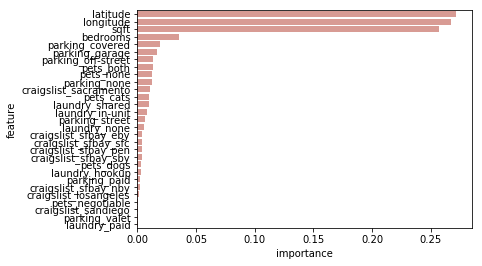

In [33]:
imp = imp.to_frame().reset_index()
imp.columns = ['feature','importance']
ax = sns.barplot("importance", y="feature", data=imp,
                  color="salmon", saturation=.5)

Gradient boosting performs even better than random forest, with lower quantile loss score and shorter time. It is also worth mention that the three most important features that may influence renting price is Latitude, longitude and size of the flat.